In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Corsiacqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione/Corsi_acqua_Piano_di_Gestione.dbf')
Corsiacqua

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."
2,215,IT03N0080447LO,naturale,Lombardia,Lambro (Fiume),Lambro (Asta),06SS4N,sì,sì,sì,no,sì,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,21811.145089,"MULTILINESTRING ((536963.747 5005395.412, 5369..."
3,252,IT03N008044003021LO,naturale,Lombardia,Garbogera (Torrente),Lambro (Asta),06IN7N,sì,no,sì,sì,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,19767.119220,"LINESTRING (509280.513 5047845.024, 509281.795..."
4,255,IT03N0080440441LO,naturale,Lombardia,Sillaro Salerano,Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,13180.757122,"LINESTRING (528977.056 5024109.798, 528981.181..."
5,256,IT03N0080440701LO,naturale,Lombardia,Addetta (Colatore),Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,9403.459186,"MULTILINESTRING ((530299.337 5029522.740, 5302..."
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
9,67,ITIRN0080983IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,17917.785813,"MULTILINESTRING ((477477.600 5043097.081, 4774..."


In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano


In [ ]:
!pip install contextily
import contextily as ctx

In [ ]:
provMilano = province[province.DEN_UTS=='Milano']
provMilano

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."


In [ ]:
corsiMilano = Corsiacqua[Corsiacqua.intersects(provMilano.geometry.squeeze())]
corsiMilano.sort_values('SHAPE_LEN',ascending=False).head(10)


,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
18,124,IT03POTI3VICA1LO,artificiale,Lombardia,Villoresi (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,bassa,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,86549.137958,"MULTILINESTRING ((478097.612 5045956.958, 4780..."
36,593,IT03N00800112LO,naturale,Lombardia,Adda (Fiume),Adda Sub Lacuale (Asta),06GL3N,sì,sì,sì,sì,no,no,no,sì,no,sì,ADDA,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,61066.374854,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
10,84,IT03POAD3MUCA1LO,artificiale,Lombardia,Muzza (Colatore),nd,None,sì,no,sì,no,no,no,no,no,no,sì,ADDA,no,no,sufficiente,bassa,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,60521.688952,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
31,501,IT03POLSSEMACA1LO,artificiale,Lombardia,Naviglio Martesana (Canale),nd,None,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38123.487110,"LINESTRING (541227.887 5050214.931, 541227.203..."
26,357,IT03N008044002012LO,naturale,Lombardia,Olona (Fiume),Olona,06SS2D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,36885.391167,"MULTILINESTRING ((495438.399 5047188.843, 4954..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
15,112,IT03N0080440022LO,naturale,Lombardia,Lambro Meridionale (Colatore),Lambro (Asta),06SS3D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,35449.017426,"MULTILINESTRING ((516227.432 5021570.890, 5162..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."


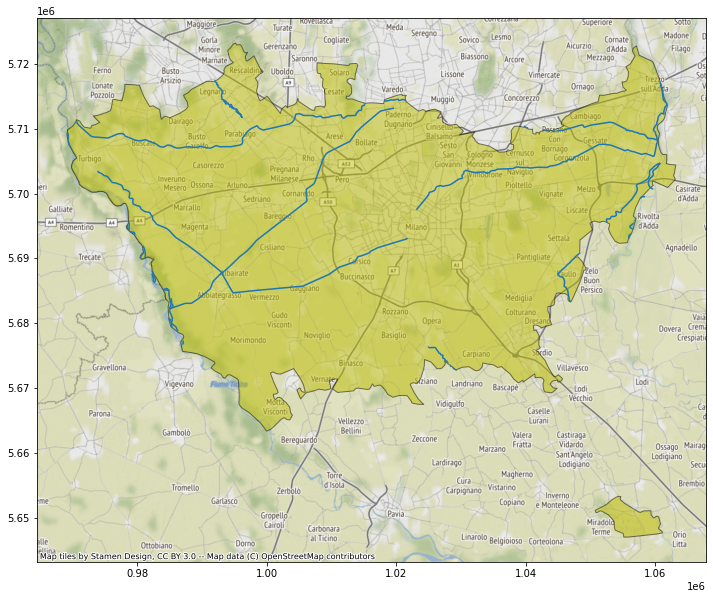

In [ ]:
ax = corsiMilano.sort_values('SHAPE_LEN',ascending=False).head(10).to_crs(epsg=3857).plot(figsize=(15,10))
provMilano.to_crs(epsg=3857).plot(ax=ax,facecolor='y',edgecolor='k',alpha=0.5)
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa


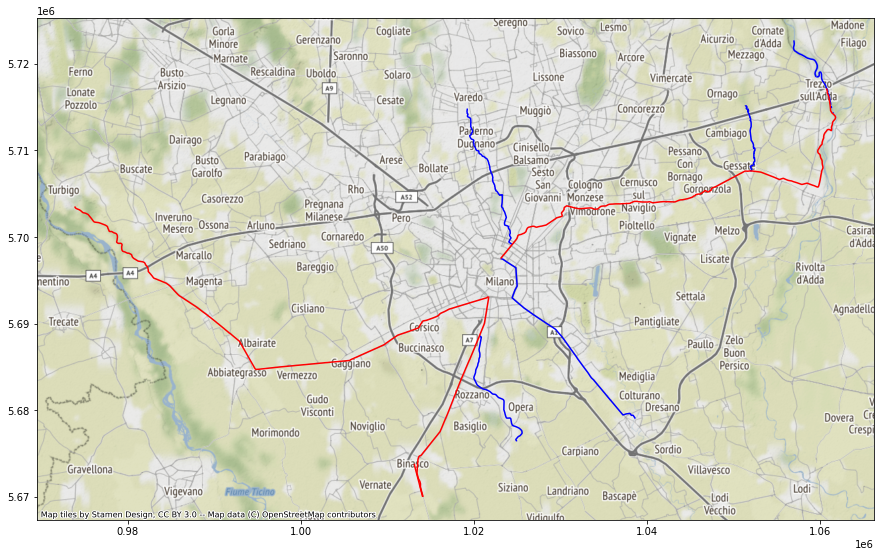

In [ ]:
navigli = Corsiacqua[Corsiacqua.NOME.str.contains('Navigli')]
fiumi = Corsiacqua[Corsiacqua.touches(navigli.unary_union)]
ax = fiumi.to_crs(epsg=3857).plot(figsize=(15,15),facecolor='none',color='blue')
navigli.to_crs(epsg=3857).plot(ax=ax,color='red')
ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente


In [ ]:
comuni =  geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g')
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


Milano


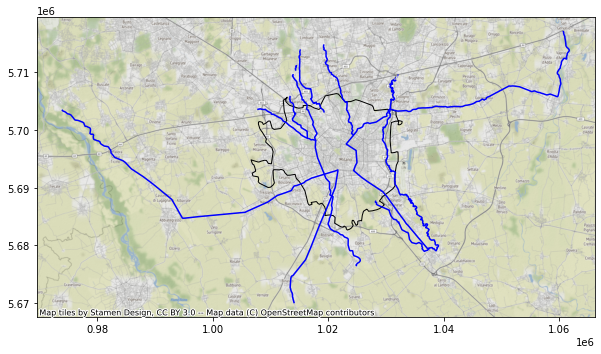

In [ ]:
comune = input()
comuniUtente = comuni[comuni.COMUNE == comune]
fiumiUtente = Corsiacqua[Corsiacqua.intersects(comuniUtente.geometry.squeeze())]
ax = fiumiUtente.to_crs(epsg=3857).plot(color='blue',edgecolor='k',figsize=(10,10))
comuniUtente.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

Lambro (Fiume)


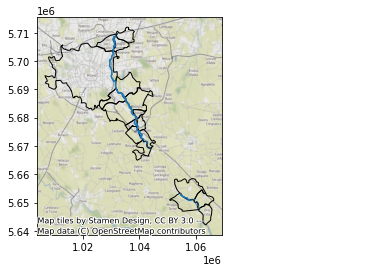

In [ ]:
user = input()
lst = list(Corsiacqua['NOME'])
if user not in lst:
  print('Fiume inesistente')
else:
  fiume = Corsiacqua[Corsiacqua.NOME==user]
  comunifiume = comuni[comuni.intersects(fiume.unary_union)]
  ax = comunifiume.to_crs(3857).plot(facecolor='none',edgecolor='k')
  fiume.to_crs(3857).plot(ax=ax,facecolor='none')
  ctx.add_basemap(ax)

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua


In [ ]:
corsiMilano.NOME.count()

45

In [ ]:
corsiMilano.SHAPE_LEN.sum()

1083787.6793008223

6. visualizzi su unamappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua
